# Training the model

<br>

#### Necessary imports for keras

***

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays.
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Nicer plots.
import seaborn as sns

In [2]:
# Data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

x = df['speed']
y = df['power']

print(df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


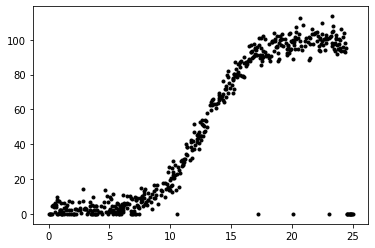

In [3]:
# Plotting data set.
plt.plot(x, y, 'k.')

<br>
After plotting the data set we can determine that the function used to get power from the speed is sigmoid. The reasoning behind this is due to the shape of the graph.  The difference in this situation is that the values are all positive instead of beginning both negative and positive.
<br>

***

##### Sigmoid Graph Example


<img style="float: left;" src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="500" height="500">

In [4]:
outliers = df[x > 10][y == 0.000]
print(outliers)

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


<ipython-input-4-b5df120ecb36>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[x > 10][y == 0.000]


In [5]:
df = df.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499])

X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values
X = X.reshape(-1, 1)

print(X)
print(Y)

[[ 0.   ]
 [ 0.125]
 [ 0.15 ]
 [ 0.225]
 [ 0.275]
 [ 0.325]
 [ 0.4  ]
 [ 0.45 ]
 [ 0.501]
 [ 0.526]
 [ 0.551]
 [ 0.576]
 [ 0.626]
 [ 0.676]
 [ 0.701]
 [ 0.726]
 [ 0.751]
 [ 0.801]
 [ 0.826]
 [ 0.851]
 [ 0.926]
 [ 0.951]
 [ 0.976]
 [ 1.001]
 [ 1.026]
 [ 1.051]
 [ 1.076]
 [ 1.101]
 [ 1.151]
 [ 1.251]
 [ 1.276]
 [ 1.301]
 [ 1.401]
 [ 1.426]
 [ 1.502]
 [ 1.552]
 [ 1.652]
 [ 1.677]
 [ 1.702]
 [ 1.827]
 [ 1.877]
 [ 1.902]
 [ 2.027]
 [ 2.077]
 [ 2.102]
 [ 2.177]
 [ 2.227]
 [ 2.252]
 [ 2.402]
 [ 2.477]
 [ 2.553]
 [ 2.578]
 [ 2.703]
 [ 2.828]
 [ 2.853]
 [ 2.953]
 [ 3.003]
 [ 3.028]
 [ 3.053]
 [ 3.078]
 [ 3.128]
 [ 3.203]
 [ 3.378]
 [ 3.403]
 [ 3.428]
 [ 3.504]
 [ 3.529]
 [ 3.579]
 [ 3.604]
 [ 3.629]
 [ 3.679]
 [ 3.704]
 [ 3.729]
 [ 3.779]
 [ 3.804]
 [ 3.879]
 [ 3.904]
 [ 3.929]
 [ 3.954]
 [ 3.979]
 [ 4.179]
 [ 4.304]
 [ 4.329]
 [ 4.429]
 [ 4.53 ]
 [ 4.555]
 [ 4.605]
 [ 4.73 ]
 [ 4.78 ]
 [ 4.88 ]
 [ 4.905]
 [ 4.93 ]
 [ 4.955]
 [ 4.98 ]
 [ 5.03 ]
 [ 5.08 ]
 [ 5.13 ]
 [ 5.18 ]
 [ 5.205]
 [ 5.255]


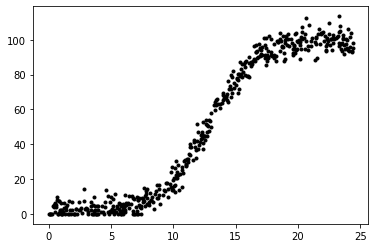

In [6]:
# Plotting data set.
plt.plot(X, Y, 'k.')

In [7]:
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [8]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(3, input_shape=(6,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [9]:
# Train the neural network on our df data
model.fit(X, Y, epochs=1000,  validation_split=0.2)

Epoch 1/1000


ValueError: in user code:

    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\colin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 6 but received input with shape [None, 1]


<br>
https://keras.io/examples/vision/mnist_convnet/

***

# End